In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import sys
import random
import math
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
class Vertex:
    def __init__(self, node,lon,lat,cont):
      rand = random.randrange(9000,100000)
      self.id = node
      self.adjacent = {}
      # Distancia infinito para todos los nodos (infinito es un random grande)
      self.distance = rand
      self.distanceG = rand
      self.distanceF = rand
      # Todos los nodos inician como no visitados    
      self.visited = False  
      # prev
      self.previous = None
      #longitud y latitud
      self.longitud = lon
      self.latitud = lat
      self.cont = cont #identificador unico para cada vertice (a parte del id)

    def agregar_vecino(self, neighbor, weight=0):
      self.adjacent[neighbor] = weight

    def obtener_conexiones(self): 
      return self.adjacent.keys() #devuelve los vecinos de tipo vertice (no numerico) 

    def obtener_id(self):
      return self.id

    def obtener_peso(self, neighbor):
      return self.adjacent[neighbor]

    def agregar_distancia(self, dist):
      self.distance = dist

    def obtener_distancia(self):
      return self.distance

    def agregar_distanciaG(self, dist):
      self.distanceG = dist

    def obtener_distanciaG(self):
      return self.distanceG

    def agregar_distanciaF(self, dist):
      self.distanceF = dist

    def obtener_distanciaF(self):
      return self.distanceF

    def obtener_lon(self):
      return self.longitud

    def obtener_lat(self):
      return self.latitud

    def agregar_previous(self, prev):
      self.previous = prev

    def visitado(self):
      self.visited = True

    def __str__(self):
      return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

class Graph:
  def __init__(self):
    self.vert_dict = {}
    self.num_vertices = 0

  def __iter__(self):
    return iter(self.vert_dict.values())

  def agregar_vertice(self, node,lon,lat,cont):
    self.num_vertices = self.num_vertices + 1
    new_vertex = Vertex(node,lon,lat,cont)
    self.vert_dict[node] = new_vertex
    return new_vertex

  def obtener_vertice(self, n):
    if n in self.vert_dict:
      return self.vert_dict[n]
    else:
      return None

  def agregar_arista(self, frm, to, cost = 0):
    if frm not in self.vert_dict:
      self.agregar_vertice(frm)
    if to not in self.vert_dict:
      self.agregar_vertice(to)

    self.vert_dict[frm].agregar_vecino(self.vert_dict[to], cost)
    #self.vert_dict[to].agregar_vecino(self.vert_dict[frm], cost) ############

  def obtener_vertices(self):
    return self.vert_dict.keys()
  
  def obtener_vertices_nodes(self):
    return self.vert_dict.values()

  def agregar_previous(self, u):
    self.previous = u

  def obtener_previous(self, u):
    return self.previous

In [3]:
g = Graph()
g.agregar_vertice(1, 0, 0, 0)
g.agregar_vertice(2, 0, 0, 1)
g.agregar_vertice(3, 0, 0, 2)
g.agregar_vertice(4, 0, 0, 3)
g.agregar_vertice(5, 0, 0, 4)
g.agregar_vertice(6, 0, 0, 5)
g.agregar_vertice(7, 0, 0, 6)
g.agregar_vertice(8, 0, 0, 7)

#source, target, longitud de la arista
g.agregar_arista(1,2,3)
g.agregar_arista(1,3,3)
g.agregar_arista(2,3,1)
g.agregar_arista(2,4,2)
g.agregar_arista(3,4,5)
g.agregar_arista(4,5,1)
g.agregar_arista(4,6,3)
g.agregar_arista(5,6,4)
g.agregar_arista(5,7,6)
g.agregar_arista(5,8,8)
g.agregar_arista(6,7,3)
g.agregar_arista(6,8,7)
g.agregar_arista(7,8,3)
##################
print(g.obtener_vertice(6))

6 adjacent: [7, 8]


# Dijkstra y A star

In [4]:
def dijkstra(aGraph, start, target):
    '''Algoritmo de Dijkstra'''
    # distancia del nodo inicial = 0
    start.agregar_distancia(0)

    # se colocarán todas las tuplas (distancia,vertice) en una cola de prioridad (Q)
    Q = []
    dic = {} #diccionario donde almaceno id,vertice
    nodos_expandidos = 0
    for v in aGraph:
        dic[v.cont] = v
        Q.append((v.obtener_distancia(),v.cont))
    heapq.heapify(Q)
    #nodos_open = []
    while len(Q):
        nodos_expandidos +=1
        # Hacemos pop a la tupla (distancia, vertice) con menor distancia de Q
        uv = heapq.heappop(Q) #Se asigna y se elimina u de Q
        #nodos_open.append(uv)
        u = dic.get(uv[1]) #Se obtiene el vértice
        u.visitado()
        #Sale del algoritmo de Dijkstra
        if(u.id == target.id):
            u_copia = u
            camino = []
            camino.append(u_copia.id)
            if(u_copia.previous):
                while(u_copia.previous):
                    camino.append(u_copia.previous.id)
                    u_copia = u_copia.previous
                #print(u.obtener_distancia(), camino[::-1])
                #print(nodos_open)
                print("longitud camino mínimo: ",len(camino))
                print("vértices expandidos: ",nodos_expandidos)
                eficiencia = len(camino)/nodos_expandidos
                print("Eficiencia: ", eficiencia)
                return u.obtener_distancia(), camino[::-1]

        # Para cada vertice vecino v de u :
        for v in u.adjacent:
            if v.visited:
                continue
            new_dist = u.obtener_distancia() + u.obtener_peso(v)
            
            if new_dist < v.obtener_distancia():
                v.agregar_distancia(new_dist)
                v.agregar_previous(u)  

        #Refresh de la cola de prioridad
        # 1. Hacemos pop de todos los items
        while len(Q):
            heapq.heappop(Q)
        # 2. Actualizamos todos los vértices no visitados del grafo
        dic = {} #diccionario donde almaceno id,vertice
        for v in aGraph:
            if not v.visited:
                dic[v.cont] = v
                Q.append((v.obtener_distancia(),v.cont))
        heapq.heapify(Q)

def h(x1,y1,x2,y2):
  '''Distancia Euclidea'''
  distance = ((x2 - x1)**2 + (y2 - y1)**2)**(1/2)
  return distance * 6371 *(math.pi/180)*1000

def AStar(aGraph, start, target):
    '''Algoritmo de A*'''
    # distancia del nodo inicial = 0
    start.agregar_distancia(0)
    start.agregar_distanciaG(0)
    start.agregar_distanciaF(h(start.longitud, start.latitud, target.longitud, target.latitud))
    # se colocarán todas las tuplas (distancia,vertice) en una cola de prioridad (Q)
    Q = []
    nodos_expandidos = 0
    dic = {} #diccionario donde almaceno id,vertice
    dic[start.cont] = start
    Q.append((start.obtener_distanciaF(),start.cont))
    heapq.heapify(Q)
    #nodos_open = []
    while len(Q):
        nodos_expandidos +=1
        # Hacemos pop a la tupla (distancia, vertice) con menor distancia de Q
        uv = heapq.heappop(Q) #Se asigna y se elimina u de Q
        #nodos_open.append(uv)
        u = dic.get(uv[1]) #Se obtiene el vértice
        u.visitado()
        #Sale del algoritmo de A*
        if(u.id == target.id):
            u_copia = u
            camino = []
            camino.append(u_copia.id)
            if(u_copia.previous):
                while(u_copia.previous):
                    camino.append(u_copia.previous.id)
                    u_copia = u_copia.previous
                #print(nodos_open)
                print("longitud camino mínimo: ",len(camino))
                print("vértices expandidos: ",nodos_expandidos)
                eficiencia = len(camino)/nodos_expandidos
                print("Eficiencia: ", eficiencia)
                return u.obtener_distanciaG(), camino[::-1]

        # Para cada vertice vecino v de u :
        for v in u.adjacent:
            if v.visited:
                continue
            temporalG = u.obtener_distanciaG() + u.obtener_peso(v)
            if temporalG < v.obtener_distanciaG():
                v.agregar_previous(u)
                v.agregar_distanciaG(temporalG)
                v.agregar_distanciaF(temporalG + h(v.longitud, v.latitud, target.longitud, target.latitud))
                if((v.distanceF,v.cont) not in Q):
                    dic[v.cont] = v
                    Q.append((v.distanceF,v.cont))

        #Refresh de la cola de prioridad Q
        valores = list(dic.values())
        # 1. Hacemos pop de todos los items
        while len(Q):
            heapq.heappop(Q)
        # 2. Actualizamos solo los vértices no visitados que están en Q, NO de todo el grafo
        dic = {}
        for v in aGraph:
            if v in valores:
                if not v.visited:
                    dic[v.cont] = v
                    Q.append((v.obtener_distanciaF(),v.cont))
        heapq.heapify(Q)     

# Probando Dijkstra y A star

In [ ]:
### Grafo 1
vertices1 = pd.read_csv("mapas/mapa1/nodes1.csv")
aristas1 = pd.read_csv("mapas/mapa1/edges1.csv")

#numero de nodos
print("numero de vértices: ",vertices1.shape[0])
#numero de vertices
print("numero de aristas: ", aristas1.shape[0])

dic = {1209259836:1209249054, 5415433275:4150231329, 5415363580:1052552702, 1057089844:5411247473, 1057089595:5413212234}
origen = list(dic.keys())
destino = list(dic.values())
for k in range(5):
  g = Graph()
  for i in range(vertices1.shape[0]):
    g.agregar_vertice(vertices1["id"][i], vertices1["lon"][i], vertices1["lat"][i],i)

  for j in range(aristas1.shape[0]):
    g.agregar_arista(aristas1["source"][j],aristas1["target"][j],aristas1["length"][j])
    
  print("ejecucion",k+1, "Vértice inicial", origen[k], "vertice final: ", destino[k])

  inicio = time.time()
  print("#######DIJKSTRA########")
  distancia, camino_min = dijkstra(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio) 
  print("Distancia mínima: ", distancia)
  inicio = time.time()
  print("######### A* #################")
  g = Graph()
  for i in range(vertices1.shape[0]):
    g.agregar_vertice(vertices1["id"][i], vertices1["lon"][i], vertices1["lat"][i],i)

  for j in range(aristas1.shape[0]):
    g.agregar_arista(aristas1["source"][j],aristas1["target"][j],aristas1["length"][j])
  distancia, camino_min = AStar(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio) 
  print("Distancia mínima: ", distancia)
  #print("Camino:", camino_min)

In [20]:
### Grafo 2
vertices2 = pd.read_csv("mapas/mapa2/nodes2.csv")
aristas2 = pd.read_csv("mapas/mapa2/edges2.csv")

#numero de nodos
print("numero de vértices: ",vertices2.shape[0])
#numero de vertices
print("numero de aristas: ", aristas2.shape[0])

dic = {9851999130:9291573217, 827102887:3978784924, 6129593671:6996695354, 816553218:6334634229, 4554440020:8195479337}
origen = list(dic.keys())
destino = list(dic.values())

for k in range(5):
  g = Graph()
  for i in range(vertices2.shape[0]):
    g.agregar_vertice(vertices2["id"][i], vertices2["lon"][i], vertices2["lat"][i],i)

  for j in range(aristas2.shape[0]):
    g.agregar_arista(aristas2["source"][j],aristas2["target"][j],aristas2["length"][j])
    
  print("ejecucion",k+1, "Vértice inicial", origen[k], "vertice final: ", destino[k])

  inicio = time.time()
  print("#######DIJKSTRA########")
  distancia, camino_min = dijkstra(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio) 
  print("Distancia mínima: ", distancia)
  inicio = time.time()
  print("######### A* #################")
  g = Graph()
  for i in range(vertices2.shape[0]):
    g.agregar_vertice(vertices2["id"][i], vertices2["lon"][i], vertices2["lat"][i],i)

  for j in range(aristas2.shape[0]):
    g.agregar_arista(aristas2["source"][j],aristas2["target"][j],aristas2["length"][j])
    
  distancia, camino_min = AStar(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio) 
  print("Distancia mínima: ", distancia)
  #print("Camino:", camino_min)

numero de vértices:  2758
numero de aristas:  4005
ejecucion 1 Vértice inicial 9851999130 vertice final:  9291573217
#######DIJKSTRA########
longitud camino mínimo:  38
vértices expandidos:  892
Eficiencia:  0.042600896860986545
Tiempo:  2.136387586593628
Distancia mínima:  1688.356773329391
######### A* #################
longitud camino mínimo:  38
vértices expandidos:  235
Eficiencia:  0.16170212765957448
Tiempo:  0.3377842903137207
Distancia mínima:  1688.356773329391
ejecucion 2 Vértice inicial 827102887 vertice final:  3978784924
#######DIJKSTRA########
longitud camino mínimo:  24
vértices expandidos:  510
Eficiencia:  0.047058823529411764
Tiempo:  1.4389595985412598
Distancia mínima:  1434.599400565408
######### A* #################
longitud camino mínimo:  24
vértices expandidos:  160
Eficiencia:  0.15
Tiempo:  0.251326322555542
Distancia mínima:  1434.599400565408
ejecucion 3 Vértice inicial 6129593671 vertice final:  6996695354
#######DIJKSTRA########
longitud camino mínimo:  

In [24]:
### Grafo 3
vertices3 = pd.read_csv("mapas/mapa3/nodes3.csv")
aristas3 = pd.read_csv("mapas/mapa3/edges3.csv")
#numero de nodos
print("numero de vértices: ",vertices3.shape[0])
#numero de vertices
print("numero de aristas: ", aristas3.shape[0])

dic = {4261133139:4436916496, 7061771522:6381144732, 847505374:846599893, 1440130628:9170954994, 6432939310:4436799819}
origen = list(dic.keys())
destino = list(dic.values())

for k in range(5):
  g = Graph()
  for i in range(vertices3.shape[0]):
    g.agregar_vertice(vertices3["id"][i], vertices3["lon"][i], vertices3["lat"][i],i)

  for j in range(aristas3.shape[0]):
    g.agregar_arista(aristas3["source"][j],aristas3["target"][j],aristas3["length"][j])
    
  print("ejecucion",k+1, "Vértice inicial", origen[k], "vertice final: ", destino[k])

  inicio = time.time()
  print("#######DIJKSTRA########")
  distancia, camino_min = dijkstra(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio) 
  print("Distancia mínima: ", distancia)
  inicio = time.time()
  print("######### A* #################")
  g = Graph()
  for i in range(vertices3.shape[0]):
    g.agregar_vertice(vertices3["id"][i], vertices3["lon"][i], vertices3["lat"][i],i)

  for j in range(aristas3.shape[0]):
    g.agregar_arista(aristas3["source"][j],aristas3["target"][j],aristas3["length"][j])
    
  distancia, camino_min = AStar(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio)
  print("Distancia mínima: ", distancia)
  #print("Camino:", camino_min)


numero de vértices:  8814
numero de aristas:  13291
ejecucion 1 Vértice inicial 4261133139 vertice final:  4436916496
#######DIJKSTRA########
longitud camino mínimo:  46
vértices expandidos:  1117
Eficiencia:  0.04118173679498657
Tiempo:  12.637897729873657
Distancia mínima:  1752.4968832199725
######### A* #################
longitud camino mínimo:  46
vértices expandidos:  222
Eficiencia:  0.2072072072072072
Tiempo:  0.7988970279693604
Distancia mínima:  1752.4968832199725
ejecucion 2 Vértice inicial 7061771522 vertice final:  6381144732
#######DIJKSTRA########
longitud camino mínimo:  58
vértices expandidos:  1852
Eficiencia:  0.03131749460043196
Tiempo:  19.94658327102661
Distancia mínima:  2993.262095753221
######### A* #################
longitud camino mínimo:  58
vértices expandidos:  437
Eficiencia:  0.13272311212814644
Tiempo:  2.5568056106567383
Distancia mínima:  2993.262095753221
ejecucion 3 Vértice inicial 847505374 vertice final:  846599893
#######DIJKSTRA########
longitud

In [30]:
### Grafo 4
vertices4 = pd.read_csv("mapas/mapa4/nodes4.csv")
aristas4 = pd.read_csv("mapas/mapa4/edges4.csv")
#numero de nodos
print("numero de vértices: ",vertices4.shape[0])
#numero de vertices
print("numero de aristas: ", aristas4.shape[0])

dic = {1057089657:1209250686, 1209258101:1041615481, 5411247482:1052552184, 4150231326:1057089720, 1209249585:5413287787}
origen = list(dic.keys())
destino = list(dic.values())

for k in range(5):
  g = Graph()
  for i in range(vertices4.shape[0]):
    g.agregar_vertice(vertices4["id"][i], vertices4["lon"][i], vertices4["lat"][i],i)

  for j in range(aristas4.shape[0]):
    g.agregar_arista(aristas4["source"][j],aristas4["target"][j],aristas4["length"][j])
    
  print("ejecucion",k+1, "Vértice inicial", origen[k], "vertice final: ", destino[k])

  inicio = time.time()
  print("#######DIJKSTRA########")
  distancia, camino_min = dijkstra(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio) 
  print("Distancia mínima: ", distancia)
  inicio = time.time()
  print("######### A* #################")
  g = Graph()
  for i in range(vertices4.shape[0]):
    g.agregar_vertice(vertices4["id"][i], vertices4["lon"][i], vertices4["lat"][i],i)

  for j in range(aristas4.shape[0]):
    g.agregar_arista(aristas4["source"][j],aristas4["target"][j],aristas4["length"][j])
    
  distancia, camino_min = AStar(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio) 
  print("Distancia mínima: ", distancia)
  #print("Camino:", camino_min)

numero de vértices:  80
numero de aristas:  109
ejecucion 1 Vértice inicial 1057089657 vertice final:  1209250686
#######DIJKSTRA########
longitud camino mínimo:  11
vértices expandidos:  50
Eficiencia:  0.22
Tiempo:  0.004988908767700195
Distancia mínima:  1421.1030335557823
######### A* #################
longitud camino mínimo:  11
vértices expandidos:  18
Eficiencia:  0.6111111111111112
Tiempo:  0.004987478256225586
Distancia mínima:  1421.1030335557823
ejecucion 2 Vértice inicial 1209258101 vertice final:  1041615481
#######DIJKSTRA########
longitud camino mínimo:  14
vértices expandidos:  57
Eficiencia:  0.24561403508771928
Tiempo:  0.004024028778076172
Distancia mínima:  875.3940456760589
######### A* #################
longitud camino mínimo:  14
vértices expandidos:  35
Eficiencia:  0.4
Tiempo:  0.004953861236572266
Distancia mínima:  875.3940456760589
ejecucion 3 Vértice inicial 5411247482 vertice final:  1052552184
#######DIJKSTRA########
longitud camino mínimo:  16
vértices e

In [31]:
## Grafo 5
vertices5 = pd.read_csv("mapas/mapa5/nodes5.csv")
aristas5 = pd.read_csv("mapas/mapa5/edges5.csv")
#numero de nodos
print("numero de vértices: ",vertices5.shape[0])
#numero de vertices
print("numero de aristas: ", aristas5.shape[0])

dic = {1273895792:1404104167, 3756612344:1657677575, 1273732538:6722093685, 3746737681:5079404145, 1709508453:1675395417}
origen = list(dic.keys())
destino = list(dic.values())

for k in range(5):
  g = Graph()
  for i in range(vertices5.shape[0]):
    g.agregar_vertice(vertices5["id"][i], vertices5["lon"][i], vertices5["lat"][i],i)

  for j in range(aristas5.shape[0]):
    g.agregar_arista(aristas5["source"][j],aristas5["target"][j],aristas5["length"][j])
  
  print("ejecucion",k+1, "Vértice inicial", origen[k], "vertice final: ", destino[k])
  
  inicio = time.time()
  print("#######DIJKSTRA########")
  distancia, camino_min = dijkstra(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio) 
  print("Distancia mínima: ", distancia)
  inicio = time.time()
  print("######### A* #################")
  g = Graph()
  for i in range(vertices5.shape[0]):
    g.agregar_vertice(vertices5["id"][i], vertices5["lon"][i], vertices5["lat"][i],i)

  for j in range(aristas5.shape[0]):
    g.agregar_arista(aristas5["source"][j],aristas5["target"][j],aristas5["length"][j])
    
  distancia, camino_min = AStar(g, g.obtener_vertice(origen[k]), g.obtener_vertice(destino[k]))
  fin = time.time()
  print("Tiempo: ",fin - inicio) 
  print("Distancia mínima: ", distancia)
  #print("Camino:", camino_min)

numero de vértices:  10100
numero de aristas:  16175
ejecucion 1 Vértice inicial 1273895792 vertice final:  1404104167
#######DIJKSTRA########
longitud camino mínimo:  113
vértices expandidos:  7951
Eficiencia:  0.01421204879889322
Tiempo:  67.00194144248962
Distancia mínima:  5995.488815641068
######### A* #################
longitud camino mínimo:  116
vértices expandidos:  3018
Eficiencia:  0.038436050364479786
Tiempo:  50.33934783935547
Distancia mínima:  5995.868313327525
ejecucion 2 Vértice inicial 3756612344 vertice final:  1657677575
#######DIJKSTRA########
longitud camino mínimo:  25
vértices expandidos:  293
Eficiencia:  0.08532423208191127
Tiempo:  4.0416929721832275
Distancia mínima:  659.7808134054269
######### A* #################
longitud camino mínimo:  25
vértices expandidos:  26
Eficiencia:  0.9615384615384616
Tiempo:  0.4777553081512451
Distancia mínima:  659.7808134054269
ejecucion 3 Vértice inicial 1273732538 vertice final:  6722093685
#######DIJKSTRA########
longit

# AG

In [4]:
#N = Número de individuos
# G = Grafo
#s = nodo inicial
#t = nodo final
def esBucle(nodo):
  banderas = []
  adyacentes = nodo.obtener_conexiones()
  for adyacente in adyacentes:
    if adyacente.visited == True:
      banderas.append(True)
    else: banderas.append(False)
  if(len(banderas) == 1): return banderas[0]
  for i in range(len(banderas) - 1):
    if(i == 0):
      respuesta = banderas[i] and banderas[i+1]
    else:
      respuesta = respuesta and banderas[i+1]
  return respuesta

def poblacionInicial(N, s, t, G):
    poblacion = []
    for i in range(N):
        actual = s
        individuo = []
        individuo.insert(0,s)
        actual.visited = True
        while(actual != t):
            adyacentes = list(actual.obtener_conexiones())
            nodo = random.choice(list(adyacentes))
            if(esBucle(nodo) and nodo != t):
                nodo.visited = True
            if(nodo.visited == False):
                if(actual not in individuo):
                    individuo.append(actual)
                individuo.append(nodo)
                nodo.visited = True
                actual = nodo
            if(esBucle(actual) and actual != t):
                actual.visited = True
                actual = individuo.pop()
        poblacion.append(individuo)
        for vertice in list(G.obtener_vertices_nodes()):
            vertice.visited = False
    return poblacion

def f(x):
    return x
def fitness(individuo):
    suma = 0
    for i in range(len(individuo) - 1):
        suma = suma + individuo[i].obtener_peso(individuo[i+1])
    return suma

def crossover(x1, x2, CROSSOVER_RATIO):
    if(random.random()<= CROSSOVER_RATIO):
        inicio = x1[0]
        final = x1[-1]
        for i in range(len(x1)):
            if x1[i] in x2 and x1[i] is not inicio and x1[i] is not final:
                corte1 = i + 1
                for j in range(len(x2)):
                    if x2[j] == x1[corte1 - 1]:
                        corte2 = j + 1
                aux = x1.copy()
                x1[corte1:] = x2[corte2:]
                x2[corte2:] = aux[corte1:]
                return x1,x2
    return x1,x2

def operaciones_seleccion_proporcional(cadbin, best, num_padres, CROSSOVER_RATE,MUTATION_RATE):
  c = np.ndarray([],dtype=object) #padres
  h = [] #hijos
  prob = []
  #Llevando los valores más bajos arriba, y los más altos abajo, ya que lo que quiero es minimizar
  F = []
  for i in range(len(best)):
    F.append(max(best) - best[i] + 1e-6)
  for i in range(len(F)):
    prob.append((F[i]+100)/(sum(F)+(100*len(F))))
  #num_padres siempre es par
  c = np.random.choice(cadbin.copy(),num_padres,replace=False, p=prob)
  indice2 = 0
  for i in range(int(num_padres/2)):
    c1 , c2 = crossover(c[indice2], c[indice2+1],CROSSOVER_RATE)
    h.append(c1)
    h.append(c2)
    indice = indice2 - 1
    for k in range(2): #Siempre será 2, pues evaluamos a los dos nuevos hijos
      cadbin.append(h[indice+1])
      indice = indice+1
    indice2 = indice2+2
  return cadbin

def select_prob(cadbin, POBLACION): #Se seleccionan las POBLACION mejores soluciones para la siguiente generacion
  pesos = []
  probs = []
  next_generation = []
  for i in range(len(cadbin)):
    pesos.append(fitness(cadbin[i]))
  
  dic = {}
  for i in range(len(cadbin)):
    dic[tuple(cadbin[i])] = pesos[i]
  #dic = dict(zip(cadbin, pesos)) #Convierto mis 2 listas en un diccionario de forma: {"2847140394": 2}
  dic_ordenado = dict(sorted(dic.items(), key=lambda x: x[1])) #Ordeno según los pesos (valores del diccionario)
  next_generation = list(dic_ordenado.keys())
  for i in range(len(next_generation)):
    next_generation[i] = list(next_generation[i])
  return next_generation[0:POBLACION]

In [5]:
def vns(individuo):
    
    return individuo

In [6]:
def AG_caminoMinimo(N,GENERACIONES,CROSSOVER_RATE,MUTATION_RATE, num_padres, s, t, g):
    cadbin = poblacionInicial(N,g.obtener_vertice(s), g.obtener_vertice(t),g)
    POBLACION = N
    mejores_por_generacion = []
    mejor = []
    for j in range(N):
        mejor.append(fitness(cadbin[j]))
    mejores_por_generacion.append(min(mejor))
    ##Inicio del algoritmo
    for i in range(GENERACIONES):
        best = []
        mejor = []
        for j  in range(N):
            best.append(fitness(cadbin[j]))
        cadbin = operaciones_seleccion_proporcional(cadbin, best, num_padres, CROSSOVER_RATE, MUTATION_RATE)
        N = len(cadbin)
        best = []
        for j in range(N):
            best.append(fitness(cadbin[j]))
        cadbin = select_prob(cadbin, POBLACION)
        N = len(cadbin)
        for j in range(N):
            mejor.append(fitness(cadbin[j]))
        mejores_por_generacion.append(min(mejor))
    respuestas = []
    for i in range(len(cadbin)):
        respuestas.append(fitness(cadbin[i]))
    print("mejor fitness final: ", min(respuestas))
    return mejores_por_generacion

mejor fitness final:  221.12913789532936


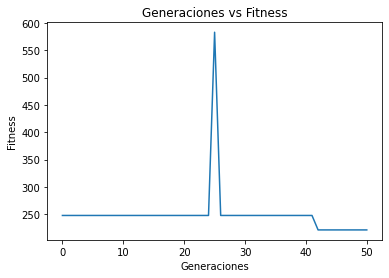

In [7]:
df_aristas = pd.read_csv("data-ejemplo/aristas.csv")
df_vertices = pd.read_csv("data-ejemplo/nodos.csv")

g = Graph()
for i in range(df_vertices.shape[0]):
  g.agregar_vertice(df_vertices["id"][i], df_vertices["lon"][i], df_vertices["lat"][i],i)

for j in range(df_aristas.shape[0]):
  g.agregar_arista(df_aristas["source"][j],df_aristas["target"][j],df_aristas["length"][j])

N = 15
num_padres = 6
s = 5394544018
t = 5394544016

CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.1
GENERACIONES = 50
f = AG_caminoMinimo(N, GENERACIONES, CROSSOVER_RATE, MUTATION_RATE, num_padres, s, t, g)

plt.title("Generaciones vs Fitness")
plt.plot(f)
plt.ylabel("Fitness")
plt.xlabel("Generaciones")
plt.show()